In [1]:
# Load MNIST dataset from interwebz
# https://www.tensorflow.org/get_started/mnist/beginners
#
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


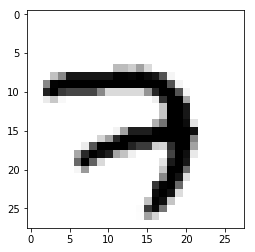

In [22]:
# check out the datas
#
import matplotlib.pyplot as plt
import numpy as np

i = 0
D = mnist.train.images.shape[1]
d = int(np.sqrt(D))

plt.imshow(img, cmap='Greys')
plt.show()

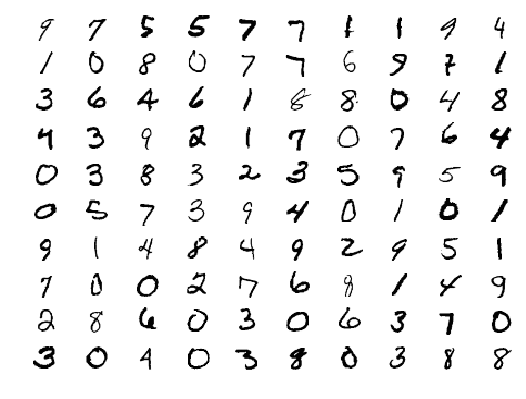

In [27]:
# show 100 random images
#
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(8, 6), dpi=80)

idx = np.random.choice(mnist.train.images.shape[0], size=100, replace=False)

i = 0
for row in ax:
    for col in row:
        img = mnist.train.images[idx[i],:].reshape((d, d))
        i += 1
        col.imshow(img, cmap='Greys')
        col.axis('off')

plt.show()

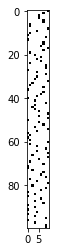

In [37]:
# targets = labels = y = one-hot vectors
#

plt.imshow(mnist.train.labels[idx,:], cmap='Greys')
plt.show()

In [40]:
# Define the model
# Generalized linear model with softmax link f'n (softmax regression)
# y = softmax(x W + b)
#
import tensorflow as tf

# input data. None = can be any dimension
# each data point (image) x is a row vecor of length 784
#
x = tf.placeholder(tf.float32, [None, 784])

# weight matrix W and bias b
#
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# define the GLM
# y = softmax(x W + b)
#
y = tf.nn.softmax(tf.matmul(x, W) + b)

# the true labels / targets
#
y_ = tf.placeholder(tf.float32, [None, 10])

# loss function = cross-entropy H_y'(y)
# same as minimizing KL divergence b/c KL(p||q) = H_p(q) - H(p), and H(p) is constant
# also pro tip: better use softmax_cross_entropy_with_logits b/c it's more numerically stable
#
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# gradient descent on loss function
#
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [42]:
# Train the model
#
sess = tf.InteractiveSession()

# important -- initialize all variables
#
tf.global_variables_initializer().run()

# Train for 1000 iterations, in batches of 100
#
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100) # picks 100 random data points
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [47]:
# Evaluate the model
#
# tf.argmax(y,1) = most likely label for each input
# tf.argmax(y_,1) = true label for each input

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1)) # are predicted labels == true labels?
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # average success rate

print sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

0.9198


In [76]:
# Or you could look at P(correct) = sum P(correct | x) p(x) = average of y[i, argmax y_[i]] for all i
# e.g.
#
a = np.array([[1,0], [1,0], [0,1], [0,1]])
b = np.array([[0.8,0.2], [0.9,0.1], [0.3,0.7], [0.4,0.6]])
print b[xrange(b.shape[0]), np.argmax(a, 1)]

[ 0.8  0.9  0.7  0.6]


In [78]:
# Momchil's improv evaluation based on P(correct) -- see above
#
correct_mask = tf.one_hot(tf.argmax(y_,1), depth=tf.shape(y)[1], dtype=tf.bool, on_value=True, off_value=False)
prob_correct = tf.boolean_mask(y, correct_mask)

#print sess.run(tf.shape(y), feed_dict={x: mnist.test.images, y_: mnist.test.labels})
#print sess.run(tf.shape(correct_mask), feed_dict={x: mnist.test.images, y_: mnist.test.labels})
#print sess.run(prob_correct, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
#print sess.run(y, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
#print sess.run(prob_correct, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
print sess.run(tf.reduce_mean(prob_correct), feed_dict={x: mnist.test.images, y_: mnist.test.labels})


0.861108


[ 0.8  0.9  0.7  0.6]


Help on class xrange in module __builtin__:

class xrange(object)
 |  xrange(stop) -> xrange object
 |  xrange(start, stop[, step]) -> xrange object
 |  
 |  Like range(), but instead of returning a list, returns an object that
 |  generates the numbers in the range on demand.  For looping, this is 
 |  slightly faster than range() and more memory efficient.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(...)
 |      x.__getattribute__('name') <==> x.name
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __iter__(...)
 |      x.__iter__() <==> iter(x)
 |  
 |  __len__(...)
 |      x.__len__() <==> len(x)
 |  
 |  __reduce__(...)
 |  
 |  __repr__(...)
 |      x.__repr__() <==> repr(x)
 |  
 |  __reversed__(...)
 |      Returns a reverse iterator.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __new__ = <built-in method __new__ of type object>
 |      T.__new__(S, ...) -> 